In [437]:
import numpy as np
from patchify import patchify
import skimage.io as io
from utils import show_images
from numpy.linalg import norm
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
import cv2


In [446]:


def irls(X,z,r,Iirls,patch_size,subsampling_gap):
    Xp=patchify(X,patch_size,subsampling_gap)
    num_of_patches=(np.shape(Xp)[0]+1)*(np.shape(Xp)[1]+1)
    w=(np.ones((num_of_patches,1)))
    print(w)

    # z should be initilized with patch matching
    for i in range(0,10):
        for x in range(0,np.shape(Xp)[0]):
            for y in range(0,np.shape(Xp)[1]):
                e=Xp[x,y,0,:,:,:]-z[x,y,0,:,:,:]
                e2=np.sum(e**2)**0.5+0.00001
                w[x*np.shape(Xp)[0]+y]=(e2**(r-2))
                Xp[x,y,0,:,:,:]+=(z[x,y,0,:,:,:]-Xp[x,y,0,:,:,:])*w[x*np.shape(Xp)[0]+y]




[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


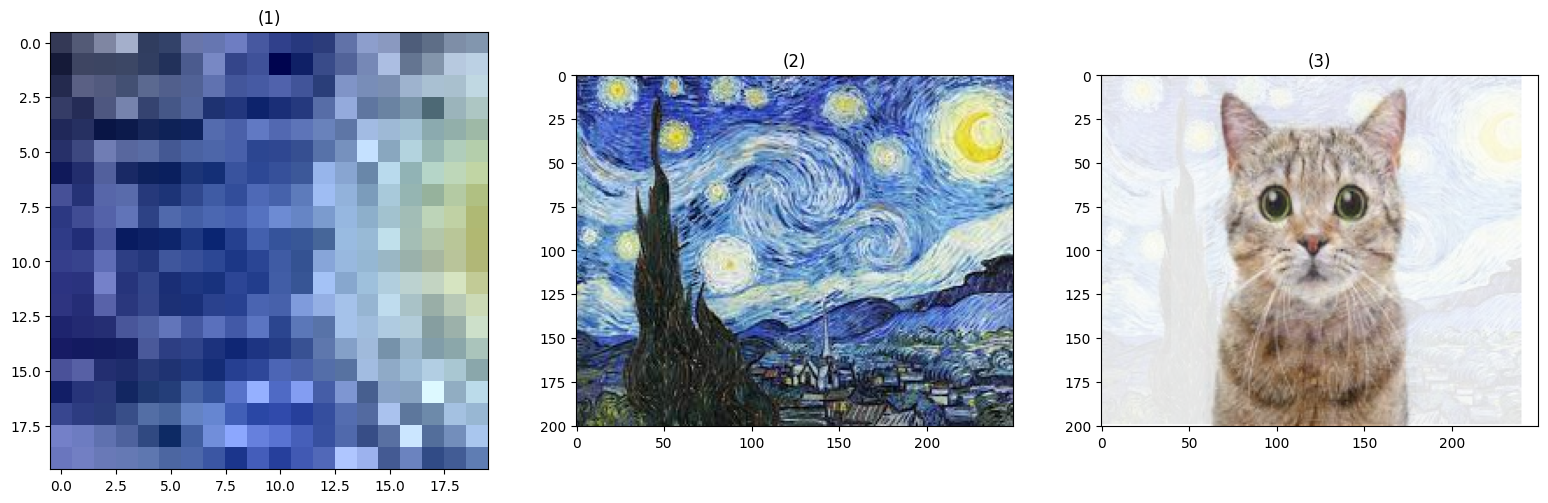

In [447]:
img=io.imread("imgs/starry.jpg")
X=io.imread("imgs/vat.jpg")
X=cv2.resize(X,(np.shape(img)[1],np.shape(img)[0]))
img=cv2.resize(img,(np.shape(X)[1],np.shape(X)[0]))
img=img.astype(float)
X=X.astype(float)
imgp=patchify(img,(20,20,3),20)
# X=np.zeros(np.shape(img)).astype(float)
# X[0:np.shape(img)[0]//2,0:np.shape(img)[1]//2,:]=img[0:np.shape(img)[0]//2,0:np.shape(img)[1]//2,:]
# subimage=imgp[0,0,0,:,:,:]

# X=np.zeros(np.shape(img))
irls(X,imgp,1.5,10,(20,20,3),20)
# print(np.shape(imgp[0,0,0,:,:,:]))
show_images([imgp[0,0,0,:,:,:]/255,img/255,X/255])